In [1]:
import os
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import itertools
import os
import sys
import json
from matplotlib.collections import LineCollection
import lmfit

# from clustering_scripts import *

In [2]:
def folder_create(path):
    # check if folder exists
    if not os.path.exists(path):
        os.makedirs(path)
        print("Created folder: ", path)

In [3]:
def simple_gali(gali_matrix):
    if np.any(np.isnan(gali_matrix)):
        return np.nan
    else:
        _, s, _ = np.linalg.svd(gali_matrix)
        return np.prod(s)


def gali(gali_matrix):
    gali_matrix = np.transpose(gali_matrix, (2, 0, 1))
    gali = []
    for m in (gali_matrix):
        gali.append(simple_gali(m))
    gali = np.asarray(gali)
    return gali

In [4]:
def make_line_collection(data, amplitude, times, idx_skip=0, max_amplitude=None, min_amplitude=None):
    y = data[:,::idx_skip].copy()
    amp = amplitude[::idx_skip].copy()

    if max_amplitude is None:
        max_amplitude = np.max(amp)
    if min_amplitude is None:
        min_amplitude = np.min(amp)

    mask = (amp >= min_amplitude) & (amp <= max_amplitude)

    colormap = plt.cm.get_cmap("viridis")
    colors = [colormap(i) for i in (amp - min_amplitude) / (max_amplitude - min_amplitude)]

    # apply mask
    y[:, ~mask] = np.nan

    segs = np.zeros((len(y[0]), len(y), 2))
    segs[:,:,0] = times[:]
    segs[:,:,1] = y.T

    return segs, colors

In [5]:
DATADIR = "../data/"
FIGDIR = "../img/"

In [6]:
coord_list = ["x", "px", "y", "py", "zeta", "pzeta"]
gali_2_list = list(itertools.combinations(coord_list, 2))
gali_3_list = list(itertools.combinations(coord_list, 3))
gali_4_list = list(itertools.combinations(coord_list, 4))
gali_5_list = list(itertools.combinations(coord_list, 5))
gali_6_list = list(itertools.combinations(coord_list, 6))
all_gali = gali_2_list + gali_3_list + gali_4_list + gali_5_list + gali_6_list

In [15]:
with h5py.File(os.path.join(DATADIR, "gali_b1_worst_zeta_max.h5"), "r") as f:
    times = np.asarray(list(sorted([int(s) for s in f["gali6/x_px_y_py_zeta_pzeta/"].keys()])))
    gali2 = {
        f"{a}_{b}": np.array([np.log10(f[f"gali2/{a}_{b}/{t}"][:]) for t in times]) for a, b in gali_2_list
    }
    gali3 = {
        f"{a}_{b}_{c}": np.array([np.log10(f[f"gali3/{a}_{b}_{c}/{t}"][:]) for t in times]) for a, b, c in gali_3_list
    }
    gali4 = {
        f"{a}_{b}_{c}_{d}": np.array([np.log10(f[f"gali4/{a}_{b}_{c}_{d}/{t}"][:]) for t in times]) for a, b, c, d in gali_4_list
    }
    gali5 = {
        f"{a}_{b}_{c}_{d}_{e}": np.array([np.log10(f[f"gali5/{a}_{b}_{c}_{d}_{e}/{t}"][:]) for t in times]) for a, b, c, d, e in gali_5_list
    }
    gali6 = np.array([np.log10(f[f"gali6/{'_'.join(gali_6_list[0])}/{t}"][:]) for t in times])

Text(0, 0.5, '$y_0 [\\sigma$ units$]$')

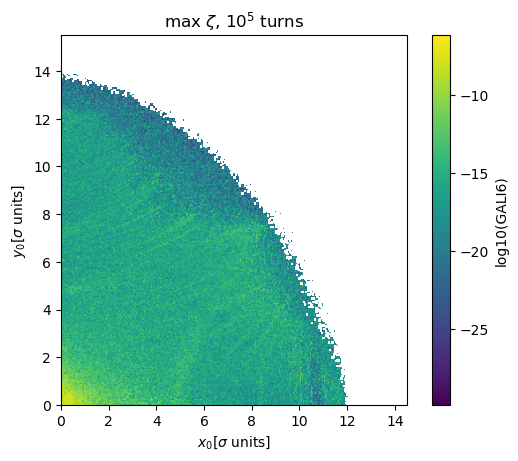

In [16]:
plt.imshow((gali6[-1]).reshape(300,300),origin="lower", extent=[0.0,14.5,0,15.5])
plt.title("max $\\zeta$, $10^5$ turns")
plt.colorbar(label="log10(GALI6)")
plt.xlabel("$x_0 [\\sigma$ units$]$")
plt.ylabel("$y_0 [\\sigma$ units$]$")

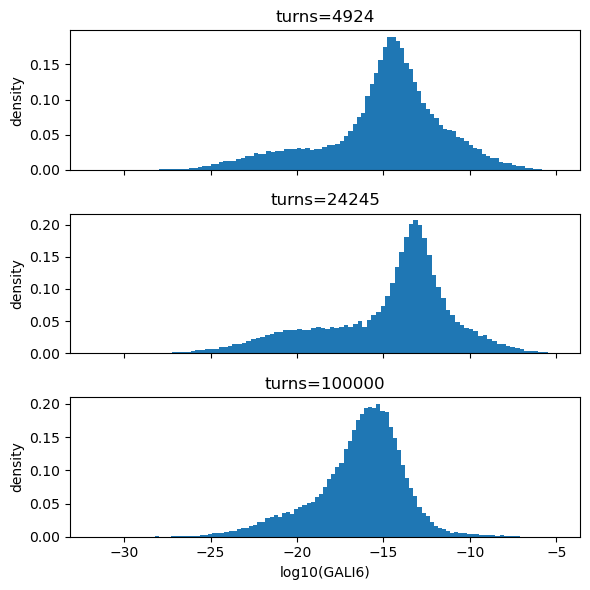

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(6, 6), sharex=True)
axs[0].hist(gali6[int(len(times)/3*2)],bins=100, density=True)
axs[0].set_title(f"turns={times[int(len(times)/3*2)]}")
axs[1].hist(gali6[int(len(times)/3*2.5)],bins=100, density=True)
axs[1].set_title(f"turns={times[int(len(times)/3*2.5)]}")
axs[2].hist(gali6[int(len(times)/3*3-1)],bins=100, density=True)
axs[2].set_title(f"turns={times[int(len(times)/3*3-1)]}")

axs[2].set_xlabel("log10(GALI6)")

axs[0].set_ylabel("density")
axs[1].set_ylabel("density")
axs[2].set_ylabel("density")

plt.tight_layout()

In [36]:
with h5py.File(os.path.join(DATADIR, "gali_b1_worst_zeta_avg.h5"), "r") as f:
    times = np.asarray(list(sorted([int(s) for s in f["gali6/x_px_y_py_zeta_pzeta/"].keys()])))
    gali2 = {
        f"{a}_{b}": np.array([np.log10(f[f"gali2/{a}_{b}/{t}"][:]) for t in times]) for a, b in gali_2_list
    }
    gali3 = {
        f"{a}_{b}_{c}": np.array([np.log10(f[f"gali3/{a}_{b}_{c}/{t}"][:]) for t in times]) for a, b, c in gali_3_list
    }
    gali4 = {
        f"{a}_{b}_{c}_{d}": np.array([np.log10(f[f"gali4/{a}_{b}_{c}_{d}/{t}"][:]) for t in times]) for a, b, c, d in gali_4_list
    }
    gali5 = {
        f"{a}_{b}_{c}_{d}_{e}": np.array([np.log10(f[f"gali5/{a}_{b}_{c}_{d}_{e}/{t}"][:]) for t in times]) for a, b, c, d, e in gali_5_list
    }
    gali6 = np.array([np.log10(f[f"gali6/{'_'.join(gali_6_list[0])}/{t}"][:]) for t in times])

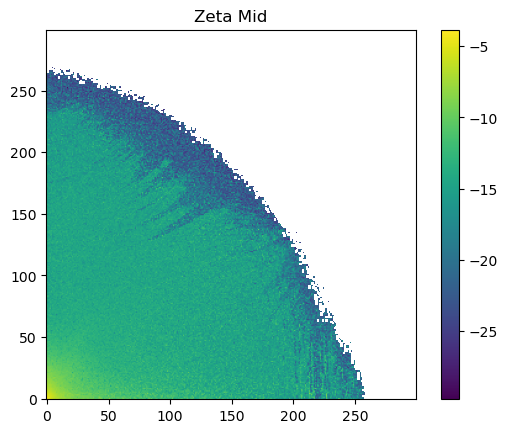

In [37]:
plt.imshow((gali6[-1]).reshape(300,300),origin="lower")
plt.title("Zeta Mid")
plt.colorbar()

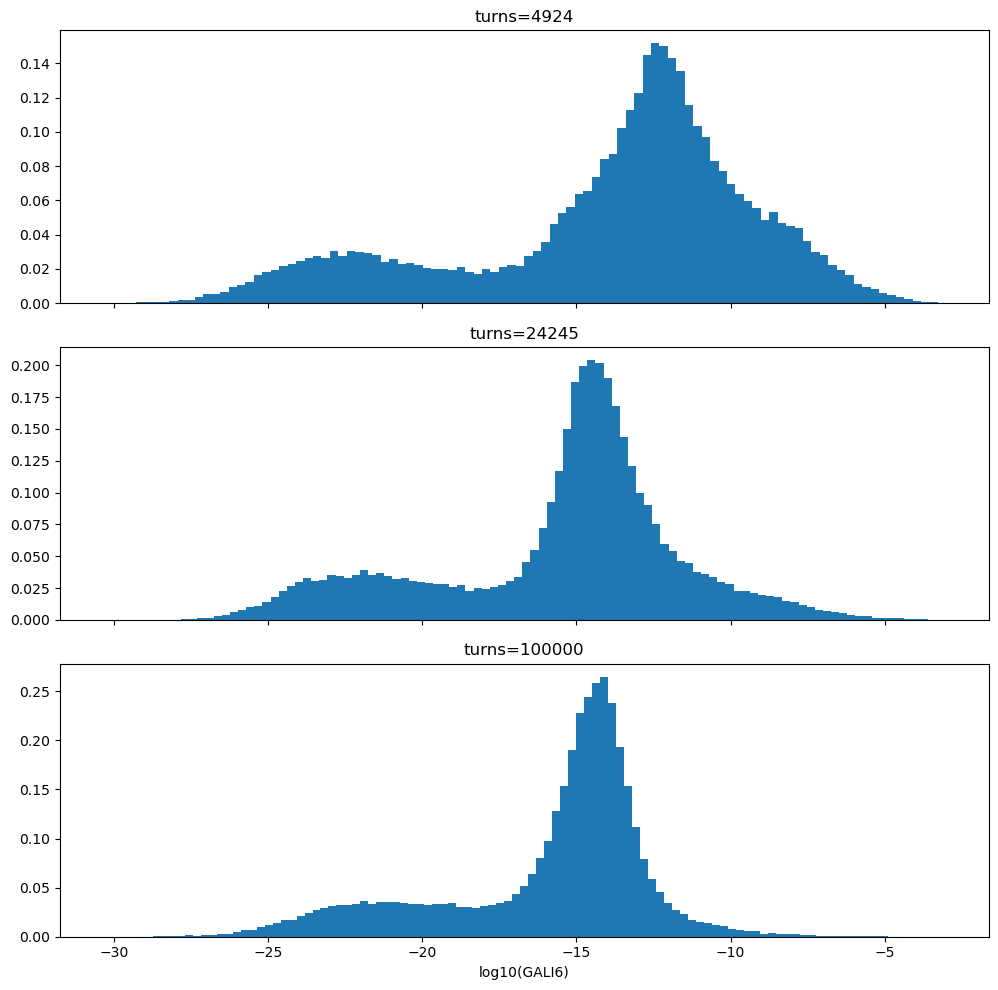

In [38]:
fig, axs = plt.subplots(3, 1, figsize=(6, 6), sharex=True)
axs[0].hist(gali6[int(len(times)/3*2)],bins=100, density=True)
axs[0].set_title(f"turns={times[int(len(times)/3*2)]}")
axs[1].hist(gali6[int(len(times)/3*2.5)],bins=100, density=True)
axs[1].set_title(f"turns={times[int(len(times)/3*2.5)]}")
axs[2].hist(gali6[int(len(times)/3*3-1)],bins=100, density=True)
axs[2].set_title(f"turns={times[int(len(times)/3*3-1)]}")

axs[2].set_xlabel("log10(GALI6)")

axs[0].set_ylabel("density")
axs[1].set_ylabel("density")
axs[2].set_ylabel("density")

plt.tight_layout()

In [18]:
with h5py.File(os.path.join(DATADIR, "gali_b1_worst_zeta_min.h5"), "r") as f:
    times = np.asarray(list(sorted([int(s) for s in f["gali6/x_px_y_py_zeta_pzeta/"].keys()])))
    gali2 = {
        f"{a}_{b}": np.array([np.log10(f[f"gali2/{a}_{b}/{t}"][:]) for t in times]) for a, b in gali_2_list
    }
    gali3 = {
        f"{a}_{b}_{c}": np.array([np.log10(f[f"gali3/{a}_{b}_{c}/{t}"][:]) for t in times]) for a, b, c in gali_3_list
    }
    gali4 = {
        f"{a}_{b}_{c}_{d}": np.array([np.log10(f[f"gali4/{a}_{b}_{c}_{d}/{t}"][:]) for t in times]) for a, b, c, d in gali_4_list
    }
    gali5 = {
        f"{a}_{b}_{c}_{d}_{e}": np.array([np.log10(f[f"gali5/{a}_{b}_{c}_{d}_{e}/{t}"][:]) for t in times]) for a, b, c, d, e in gali_5_list
    }
    gali6 = np.array([np.log10(f[f"gali6/{'_'.join(gali_6_list[0])}/{t}"][:]) for t in times])

Text(0, 0.5, '$y_0 [\\sigma$ units$]$')

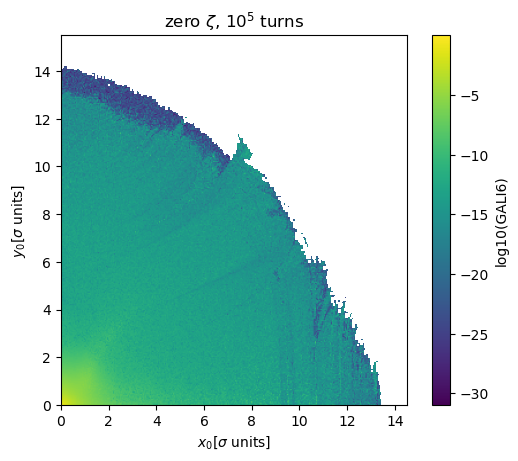

In [19]:
plt.imshow((gali6[-1]).reshape(300,300),origin="lower", extent=[0.0,14.5,0,15.5])
plt.title("zero $\\zeta$, $10^5$ turns")
plt.colorbar(label="log10(GALI6)")
plt.xlabel("$x_0 [\\sigma$ units$]$")
plt.ylabel("$y_0 [\\sigma$ units$]$")

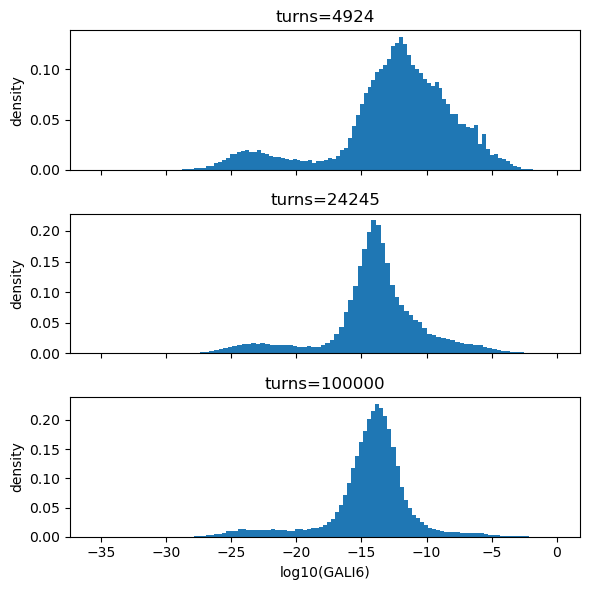

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(6, 6), sharex=True)
axs[0].hist(gali6[int(len(times)/3*2)],bins=100, density=True)
axs[0].set_title(f"turns={times[int(len(times)/3*2)]}")
axs[1].hist(gali6[int(len(times)/3*2.5)],bins=100, density=True)
axs[1].set_title(f"turns={times[int(len(times)/3*2.5)]}")
axs[2].hist(gali6[int(len(times)/3*3-1)],bins=100, density=True)
axs[2].set_title(f"turns={times[int(len(times)/3*3-1)]}")

axs[2].set_xlabel("log10(GALI6)")

axs[0].set_ylabel("density")
axs[1].set_ylabel("density")
axs[2].set_ylabel("density")

plt.tight_layout()

In [7]:
with h5py.File(os.path.join(DATADIR, "local_gali_b1_worst_zeta_min.h5"), "r") as f:
    times = list(sorted([int(s) for s in f["gali6/x_px_y_py_zeta_pzeta/"].keys()]))
    gali2 = {
        f"{a}_{b}": np.array([np.log10(f[f"gali2/{a}_{b}/{t}"][:]) for t in times]) for a, b in gali_2_list
    }
    gali3 = {
        f"{a}_{b}_{c}": np.array([np.log10(f[f"gali3/{a}_{b}_{c}/{t}"][:]) for t in times]) for a, b, c in gali_3_list
    }
    gali4 = {
        f"{a}_{b}_{c}_{d}": np.array([np.log10(f[f"gali4/{a}_{b}_{c}_{d}/{t}"][:]) for t in times]) for a, b, c, d in gali_4_list
    }
    gali5 = {
        f"{a}_{b}_{c}_{d}_{e}": np.array([np.log10(f[f"gali5/{a}_{b}_{c}_{d}_{e}/{t}"][:]) for t in times]) for a, b, c, d, e in gali_5_list
    }
    gali6 = np.array([np.log10(f[f"gali6/{'_'.join(gali_6_list[0])}/{t}"][:]) for t in times])

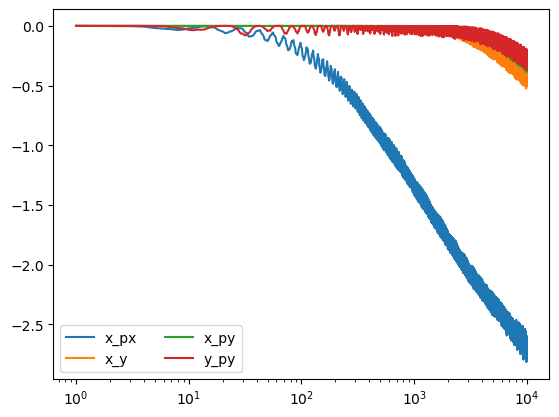

In [8]:
idx = 0
plt.plot(times, gali2["x_px"][:, idx], label="x_px")
plt.plot(times, gali2["x_y"][:, idx], label="x_y")
plt.plot(times, gali2["x_py"][:, idx], label="x_py")
plt.plot(times, gali2["y_py"][:, idx], label="y_py")
# plt.plot(times, gali2["x_zeta"][:, idx], label="x_zeta")
# plt.plot(times, gali2["x_pzeta"][:, idx], label="x_pzeta")
# plt.plot(times, gali2["zeta_pzeta"][:, idx], label="zeta_pzeta")

plt.xscale("log")

plt.legend(ncol=2)

In [13]:
gali6.shape

(10000, 2)

In [12]:
plt.imshow(gali6[-1].reshape(300,300))

ValueError: cannot reshape array of size 2 into shape (300,300)

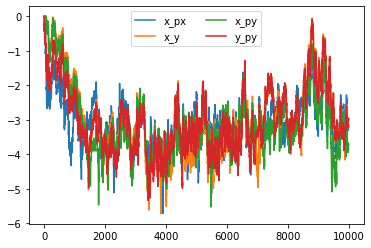

In [165]:
idx = 1
plt.plot(times, gali2["x_px"][:, idx], label="x_px")
plt.plot(times, gali2["x_y"][:, idx], label="x_y")
plt.plot(times, gali2["x_py"][:, idx], label="x_py")
plt.plot(times, gali2["y_py"][:, idx], label="y_py")
# plt.plot(times, gali2["x_zeta"][:, idx], label="x_zeta")
# plt.plot(times, gali2["x_pzeta"][:, idx], label="x_pzeta")
# plt.plot(times, gali2["zeta_pzeta"][:, idx], label="zeta_pzeta")

# plt.xscale("log")

plt.legend(ncol=2)

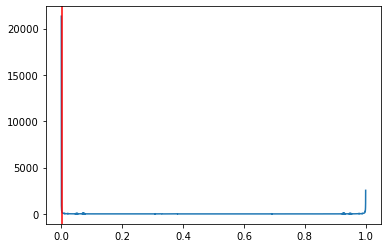

In [117]:
%matplotlib inline
plt.figure()
plt.plot(np.linspace(0,1,len(gali2["x_px"][:, idx])), np.abs(np.fft.fft(gali2["x_px"][:, idx])))
plt.axvline(0.002124907497250362, color="red")
plt.show()

In [2]:
with h5py.File(os.path.join(DATADIR, "gali_b1_worst_zeta_max.h5"), "r") as f:
    times = np.asarray(list(sorted([int(s) for s in f["gali6/x_px_y_py_zeta_pzeta/"].keys()])))
    gali2 = {
        f"{a}_{b}": np.array([np.log10(f[f"gali2/{a}_{b}/{t}"][:]) for t in times]) for a, b in gali_2_list
    }
    gali3 = {
        f"{a}_{b}_{c}": np.array([np.log10(f[f"gali3/{a}_{b}_{c}/{t}"][:]) for t in times]) for a, b, c in gali_3_list
    }
    gali4 = {
        f"{a}_{b}_{c}_{d}": np.array([np.log10(f[f"gali4/{a}_{b}_{c}_{d}/{t}"][:]) for t in times]) for a, b, c, d in gali_4_list
    }
    gali5 = {
        f"{a}_{b}_{c}_{d}_{e}": np.array([np.log10(f[f"gali5/{a}_{b}_{c}_{d}_{e}/{t}"][:]) for t in times]) for a, b, c, d, e in gali_5_list
    }
    gali6 = np.array([np.log10(f[f"gali6/{'_'.join(gali_6_list[0])}/{t}"][:]) for t in times])

NameError: name 'DATADIR' is not defined

In [62]:
f = h5py.File(os.path.join(DATADIR, "log_displacement_b1_worst_zeta_max.h5"), "r")
f['reference/initial'].keys()

<KeysViewHDF5 ['px_norm', 'py_norm', 'pzeta_norm', 'x_norm', 'y_norm', 'zeta_norm']>

In [63]:
with h5py.File(os.path.join(DATADIR, "log_displacement_b1_worst_zeta_max.h5"), "r") as f:
    amplitude = np.sqrt(
        f["reference/initial/x_norm"][:]**2 + f["reference/initial/y_norm"][:]**2
    )

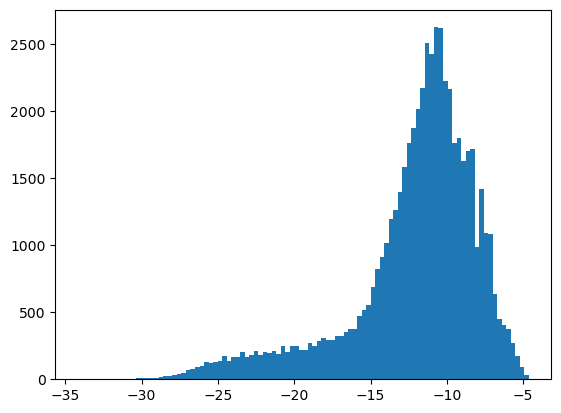

In [66]:
plt.hist(gali6[-25].reshape(300, 300).flatten(), bins=100);

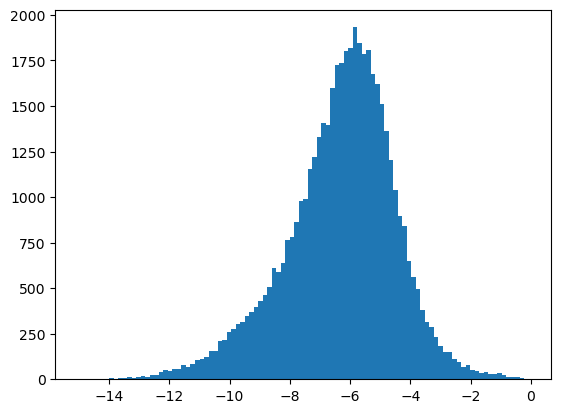

In [67]:
plt.hist(gali4["x_px_y_py"][-1].reshape(300, 300).flatten(), bins=100);

In [68]:
idx_available = np.where((gali6[-1]) > -14)[0]
idx_regular = idx_available[np.random.randint(0, len(idx_available))]

In [69]:
idx_available = np.where((gali6[-1]) < -22)[0]
idx_chaos = idx_available[np.random.randint(0, len(idx_available))]

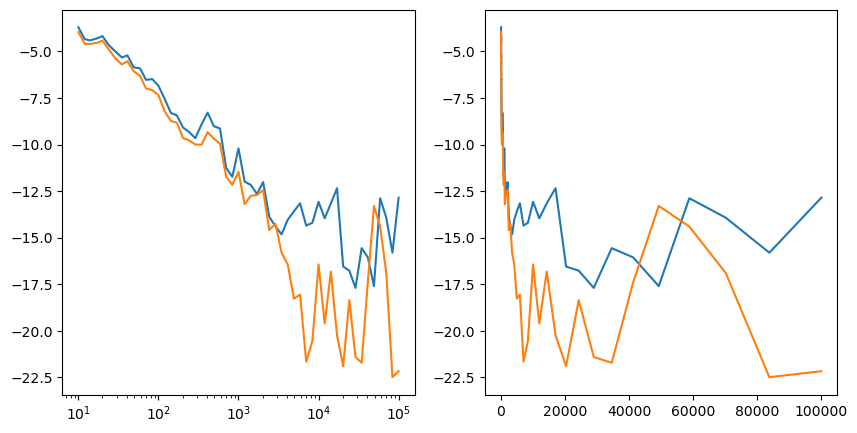

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(times, (gali6[:, idx_regular]), label="Regular")
ax[0].plot(times, (gali6[:, idx_chaos]), label="Chaos")

ax[0].set_xscale("log")

ax[1].plot(times, (gali6[:, idx_regular]), label="Regular")
ax[1].plot(times, (gali6[:, idx_chaos]), label="Chaos")


In [47]:
def power_fit(params, x, data=None):
    a = params["a"].value
    b = params["b"].value
    c = params["c"].value

    model = a + b*np.log10(x)
    model[model < c] = c

    if data is None:
        return model
    
    return model - data


def exp_fit(params, x, data=None):
    a = params["a"].value
    b = params["b"].value
    c = params["c"].value

    model = a + (b * x)
    model[model < c] = c

    if data is None:
        return model
    
    return model - data

In [48]:
out_power = []
out_exp = []

for i in [idx_regular, idx_chaos]:

    y = gali6[20:,i]
    mask = (~np.isnan(y)) & (np.isfinite(y))
    x = np.asarray(times[20:])[mask]

    
    y = y[mask]

    lmfit_params = lmfit.Parameters()
    lmfit_params.add("a", value=0.0, min=0, vary=False)
    lmfit_params.add("b", value=-1.0, max=0)
    lmfit_params.add("c", value=-23, vary=False)

    lmfit_out_power = lmfit.minimize(power_fit, lmfit_params, args=(x, y))

    lmfit_params = lmfit.Parameters()
    lmfit_params.add("a", value=0.0, min=0, vary=False)
    lmfit_params.add("b", value=-0.001)
    lmfit_params.add("c", value=-23, vary=False)

    lmfit_out_exp = lmfit.minimize(exp_fit, lmfit_params, args=(x, y))

    out_power.append(lmfit_out_power)
    out_exp.append(lmfit_out_exp)


2.9377931035959586 58.16402756406617
4.828149256769833 23.501929253002743


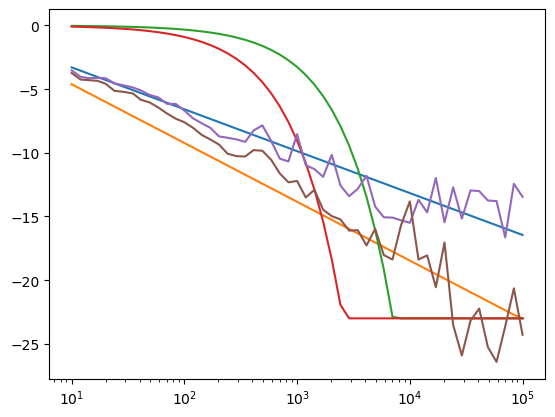

In [49]:
# plot the fits
plt.plot(times, power_fit(out_power[0].params, times), label="Power law")
plt.plot(times, power_fit(out_power[1].params, times), label="Power law")
plt.plot(times, exp_fit(out_exp[0].params, np.asarray(times)), label="Exponential")
plt.plot(times, exp_fit(out_exp[1].params, np.asarray(times)), label="Exponential")

for i in [idx_regular, idx_chaos]:

    y = gali6[:,i]
    mask = (~np.isnan(y)) & (np.isfinite(y))
    x = np.asarray(times)[mask]
    y = y[mask]
    plt.plot(x, y, label="Particle {}".format(i))

plt.xscale("log")
# plt.yscale("log")

for out_p, out_e in zip(out_power, out_exp):
    print(out_p.redchi, out_e.redchi)

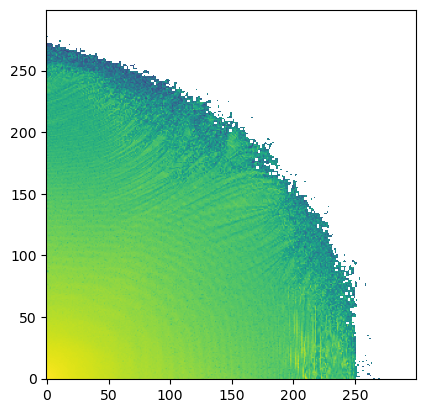

In [78]:
plt.imshow(gali6[-20].reshape(300, 300), origin="lower")

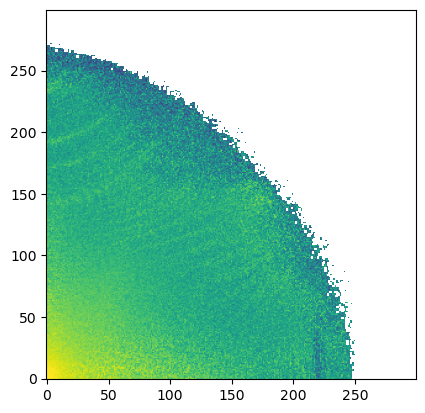

In [79]:
plt.imshow(gali4["x_px_y_py"][-10].reshape(300, 300), origin="lower")

In [101]:
data = gali2["x_y"]
idx_skip = 700
y = data[:,::idx_skip]

max_amplitude = np.max(amplitude) -4
min_amplitude = np.min(amplitude)

colormap = plt.cm.get_cmap("viridis")
colors = [colormap(i) for i in (amplitude - min_amplitude) / (max_amplitude - min_amplitude)][::idx_skip]

y.shape


(53, 129)

(array([  18.,   46.,   74.,  104.,  130.,  159.,  186.,  215.,  244.,
         269.,  305.,  326.,  356.,  387.,  410.,  441.,  469.,  493.,
         526.,  555.,  570.,  621.,  639.,  661.,  698.,  723.,  748.,
         777.,  808.,  833.,  860.,  898.,  917.,  947.,  979., 1002.,
        1031., 1060., 1089., 1116., 1141., 1163., 1214., 1229., 1250.,
        1292., 1312., 1335., 1369., 1400., 1427., 1454., 1477., 1521.,
        1539., 1563., 1598., 1624., 1647., 1676., 1704., 1741., 1751.,
        1806., 1820., 1841., 1889., 1901., 1870., 1736., 1683., 1635.,
        1606., 1469., 1300., 1198., 1108., 1036.,  969.,  898.,  847.,
         792.,  734.,  683.,  640.,  587.,  541.,  500.,  453.,  409.,
         370.,  328.,  289.,  247.,  209.,  172.,  134.,   99.,   60.,
          24.]),
 array([5.53279719e-18, 2.12249853e-01, 4.24499706e-01, 6.36749558e-01,
        8.48999411e-01, 1.06124926e+00, 1.27349912e+00, 1.48574897e+00,
        1.69799882e+00, 1.91024867e+00, 2.12249853e+00, 2.

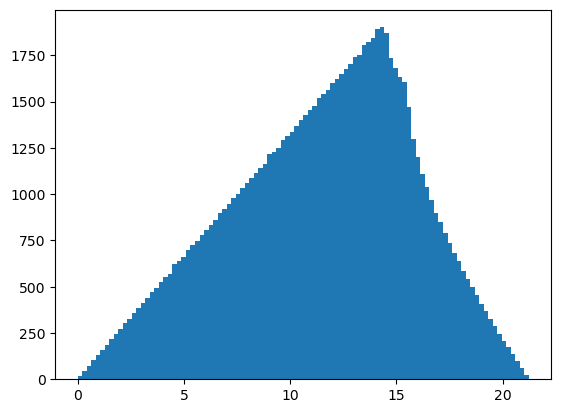

In [147]:
plt.hist(amplitude, bins=100)

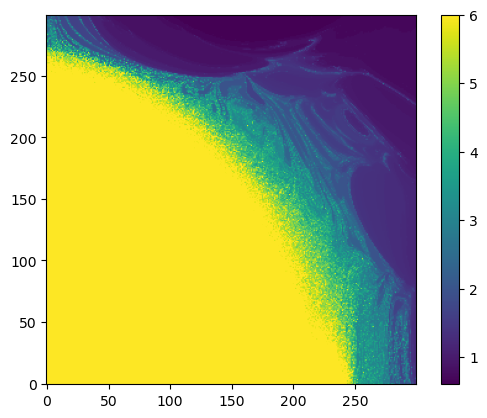

In [153]:
with h5py.File(os.path.join(DATADIR, "stability_b1_worst_zeta_max.h5"), "r") as f:
    stability = f["stability"][:]

plt.imshow(np.log10(stability).reshape(300,300), origin="lower")
plt.colorbar()

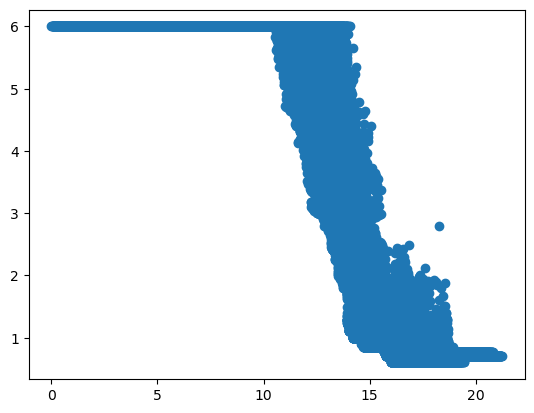

In [158]:
plt.scatter(amplitude, np.log10(stability))

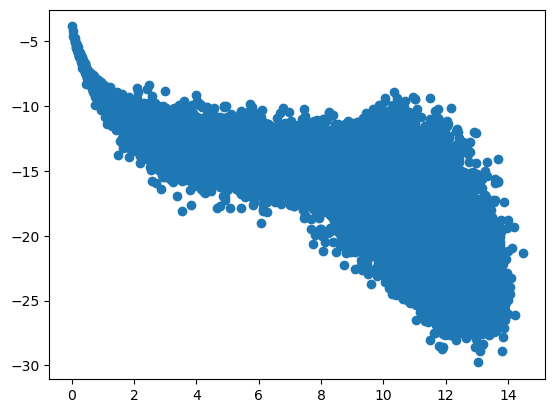

In [157]:
plt.scatter(amplitude, gali6[-1])

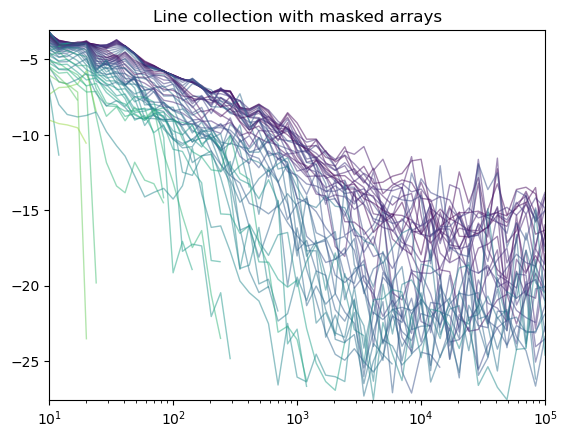

In [146]:
segs, colors = make_line_collection(gali2["x_y"], amplitude, times, idx_skip=700, min_amplitude=12, max_amplitude=20)
segs, colors = make_line_collection(gali6, amplitude, times, idx_skip=70, min_amplitude=0, max_amplitude=10)
segs, colors = make_line_collection(gali6, amplitude, times, idx_skip=700, min_amplitude=10, max_amplitude=18)


fig, ax = plt.subplots()
ax.set_xlim(np.nanmin(segs[:,:,0]), np.nanmax(segs[:,:,0]))
ax.set_ylim(np.nanmin(segs[:,:,1]), np.nanmax(segs[:,:,1])+0.1)

line_segments = LineCollection(segs, alpha=0.5, linewidths=(1,),
                               colors=colors, linestyle='solid')
ax.add_collection(line_segments)
ax.set_title('Line collection with masked arrays')
ax.set_xscale("log")

In [8]:
amplitude_choices = {
    "all": (None, None),
    "inner_core": (0, 5),
    "outer_core": (5, 10),
    "tail": (10, 15),
    "chaos": (15, None),
}

fig_name_list = [
    "worst_zeta_min",
    "worst_zeta_avg",
    # "worst_zeta_max",
    # "best_zeta_min",
    # "best_zeta_avg",
    # "best_zeta_max",
]

filenames_gali = [
    "gali_b1_worst_zeta_min.h5",
    "gali_b1_worst_zeta_avg.h5",
    # "gali_b1_worst_zeta_max.h5",
    # "gali_b1_best_zeta_min.h5",
    # "gali_b1_best_zeta_avg.h5",
    # "gali_b1_best_zeta_max.h5",
]

filenames_disp = [
    "log_displacement_b1_worst_zeta_min.h5",
    "log_displacement_b1_worst_zeta_avg.h5",
    # "log_displacement_b1_worst_zeta_max.h5",
    # "log_displacement_b1_best_zeta_min.h5",
    # "log_displacement_b1_best_zeta_avg.h5",
    # "log_displacement_b1_best_zeta_max.h5",
]

filenames_stab = [
    "stability_b1_worst_zeta_min.h5",
    "stability_b1_worst_zeta_avg.h5",
    # "stability_b1_worst_zeta_max.h5",
    # "stability_b1_best_zeta_min.h5",
    # "stability_b1_best_zeta_avg.h5",
    # "stability_b1_best_zeta_max.h5",
]

for name, f_gali, f_disp, f_stab in (zip(tqdm(fig_name_list), filenames_gali, filenames_disp, filenames_stab)):
    with h5py.File(os.path.join(DATADIR, f_gali), "r") as f:
        times = np.asarray(list(sorted([int(s) for s in f["gali6/x_px_y_py_zeta_pzeta/"].keys()])))
        gali2 = {
            f"{a}_{b}": np.array([np.log10(f[f"gali2/{a}_{b}/{t}"][:]) for t in times]) for a, b in gali_2_list
        }
        gali3 = {
            f"{a}_{b}_{c}": np.array([np.log10(f[f"gali3/{a}_{b}_{c}/{t}"][:]) for t in times]) for a, b, c in gali_3_list
        }
        gali4 = {
            f"{a}_{b}_{c}_{d}": np.array([np.log10(f[f"gali4/{a}_{b}_{c}_{d}/{t}"][:]) for t in times]) for a, b, c, d in gali_4_list
        }
        gali5 = {
            f"{a}_{b}_{c}_{d}_{e}": np.array([np.log10(f[f"gali5/{a}_{b}_{c}_{d}_{e}/{t}"][:]) for t in times]) for a, b, c, d, e in gali_5_list
        }
        gali6 = np.array([np.log10(f[f"gali6/{'_'.join(gali_6_list[0])}/{t}"][:]) for t in times])

    with h5py.File(os.path.join(DATADIR, f_disp), "r") as f:
        amplitude = np.sqrt(
            f["reference/initial/x_norm"][:]**2 + f["reference/initial/y_norm"][:]**2
        )

    for n_g, v_g in zip(tqdm(["gali_2", "gali_3", "gali_4", "gali_5"]), [gali2, gali3, gali4, gali5]):
        for key, item in tqdm(v_g.items()):
            for a_key, (amp_min, amp_max) in amplitude_choices.items():
                segs, colors = make_line_collection(item, amplitude, times, idx_skip=70, min_amplitude=amp_min, max_amplitude=amp_max)

                fig, ax = plt.subplots()
                ax.set_xlim(np.nanmin(segs[:,:,0]), np.nanmax(segs[:,:,0]))
                ax.set_ylim(np.nanmin(segs[:,:,1]), np.nanmax(segs[:,:,1])+0.1)

                line_segments = LineCollection(segs, alpha=0.5, linewidths=(1,),
                                                colors=colors, linestyle='solid')
                ax.add_collection(line_segments)
                ax.set_title(f'{n_g} - ' + key + ' - ' + a_key)
                ax.set_xscale("log")
                # add custom colorbar for the amplitude with values from amp_min to amp_max
                # https://stackoverflow.com/questions/53106501/matplotlib-colorbar-with-customized-range
                cmap = mpl.cm.get_cmap('viridis')
                norm = mpl.colors.Normalize(vmin=amp_min, vmax=amp_max)
                sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
                sm.set_array([])
                cbar = plt.colorbar(sm)

                folder_create(os.path.join(FIGDIR, f"{n_g}/{a_key}"))

                fig.savefig(os.path.join(FIGDIR, f"{n_g}/{a_key}/{f_gali}_{key}_{a_key}.jpg"), dpi=300)
                # close figure
                plt.close('all')

    for a_key, (amp_min, amp_max) in amplitude_choices.items():
        segs, colors = make_line_collection(gali6, amplitude, times, idx_skip=70, min_amplitude=amp_min, max_amplitude=amp_max)

        if amp_min is None:
            amp_min = 0
        if amp_max is None:
            amp_max = np.max(amplitude)

        fig, ax = plt.subplots()
        ax.set_xlim(np.nanmin(segs[:,:,0]), np.nanmax(segs[:,:,0]))
        ax.set_ylim(np.nanmin(segs[:,:,1]), np.nanmax(segs[:,:,1])+0.1)

        line_segments = LineCollection(segs, alpha=0.5, linewidths=(1,),
                                        colors=colors, linestyle='solid')
        ax.add_collection(line_segments)
        ax.set_title(f'gali_6 - ' + key + ' - ' + a_key)
        ax.set_xscale("log")
        # add custom colorbar for the amplitude with values from amp_min to amp_max
        # https://stackoverflow.com/questions/53106501/matplotlib-colorbar-with-customized-range
        cmap = mpl.cm.get_cmap('viridis')
        norm = mpl.colors.Normalize(vmin=amp_min, vmax=amp_max)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm)

        folder_create(os.path.join(FIGDIR, f"gali_6/{a_key}"))

        fig.savefig(os.path.join(FIGDIR, f"gali_6/{a_key}/{name}_{f_gali}_{a_key}.jpg"), dpi=300)
        # close figure
        plt.close('all')

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]